In [1]:
from qiskit import QuantumRegister
import numpy as np
from gymnasium.spaces import Box
from rl_qoc import QuantumEnvironment, BenchmarkConfig
from qiskit.circuit import QuantumCircuit, ParameterVector, Gate
from qiskit.circuit.library import CZGate
from rl_qoc import (
    QEnvConfig,
    QiboConfig,
    ExecutionConfig,
    ChannelConfig,
)
from qiskit import pulse


def param_circuit(
    qc: QuantumCircuit, params: ParameterVector, qreg: QuantumRegister, **kwargs
):
    cz_cal = Gate("cz_cal", 2, params.params)
    with pulse.build() as cz_sched:
        pulse.play(
            pulse.Gaussian(duration=160, amp=0.5, sigma=40), pulse.DriveChannel(0)
        )
        pulse.play(
            pulse.Gaussian(duration=160, amp=0.5, sigma=40), pulse.DriveChannel(1)
        )
        pulse.shift_phase(np.pi, pulse.DriveChannel(0))
        pulse.shift_phase(np.pi, pulse.DriveChannel(1))
    qc.append(cz_cal, qreg)
    qc.add_calibration(cz_cal, [0, 1], cz_sched)

    return qc


def get_backend():
    return "qibolab"


action_space_low = np.array([0.0, -np.pi, -np.pi, 16])  # [amp, phase, phase, duration]
action_space_high = np.array([1.0, np.pi, np.pi, 160])  # [amp, phase, phase, duration]
action_space = Box(action_space_low, action_space_high)
qibo_config = QiboConfig(
    param_circuit, get_backend(), platform="qibolab", qubit_pair=("D1", "D2")
)
q_env_config = QEnvConfig(
    target={"gate": CZGate(), "physical_qubits": [0, 1]},
    backend_config=qibo_config,
    action_space=action_space,
    reward_config=ChannelConfig(),
    benchmark_config=BenchmarkConfig(0),
    execution_config=ExecutionConfig(batch_size=1, sampling_paulis=50, n_shots=10),
)

env = QuantumEnvironment(q_env_config)

/Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


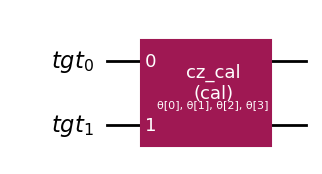

In [2]:
env.circuits[0].draw(output="mpl")

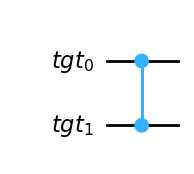

In [3]:
env.baseline_circuits[0].draw(output="mpl")

In [4]:
env.step(np.array([[0.5, 0, 0, 80]]))

Sending Estimator job...


[Qibo 0.2.13|ERROR|2024-11-10 16:06:49]: Platforms path $QIBOLAB_PLATFORMS unset.


2024-11-10 16:06:49 INFO Platforms path $QIBOLAB_PLATFORMS unset.


RuntimeError: Platforms path $QIBOLAB_PLATFORMS unset.